# Imports

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau, spearmanrr
from xicor.xicor import Xi


sns.set(style="ticks")


# Figures from wikipedia's Spearman correlation 

## Utility functions

In [24]:
def compute_correls(X, Y):
    cc = np.cov(X, Y)
    c_pearson = cc[0, 1] / np.sqrt(cc[0, 0] * cc[1, 1])
    c_kendall = kendalltau(X, Y)
    c_xi = Xi(X, Y).correlation

    c_spearman = spearmanr(X, Y)
    return c_pearson, c_spearman[0], c_kendall[0], c_xi

def add_title(c_pearson, c_spearman, c_kendall, c_xi):
    plt.title(
        "Pearson correlation = %.2f\nSpearman correlation = %.2f\nKendall tau = %.2f\nXi correlation = %.2f"
        % (c_pearson, c_spearman, c_kendall, c_xi)
    )


## Figure 1 - nonlinear monotonically increasing

Code from [figure description](https://en.wikipedia.org/wiki/File:Spearman_fig1.svg)

<Figure size 432x288 with 0 Axes>

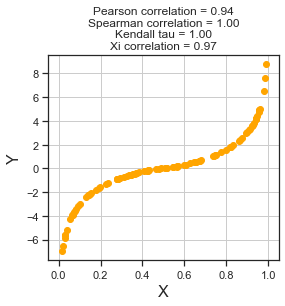

In [25]:
X = np.random.uniform(size=100)

Y = np.log(X / (1 - X))

Y = np.sign(Y) * np.abs(Y) ** 1.4





plt.clf()
plt.figure(figsize=(4, 3.8))
plt.axes([0.17, 0.12, 0.8, 0.75])
plt.plot(X, Y, "o", color="orange")
plt.grid(True)


correlations = compute_correls(X, Y)
add_title(*correlations)
plt.xlabel("X", size=16)
plt.ylabel("Y", size=16)
plt.xlim(-0.05, 1.05)
plt.savefig("spearman_fig1.pdf")
plt.savefig("spearman_fig1.svg")

## Figure 2 - semi-correlated random noise

Code from [figure description](https://en.wikipedia.org/wiki/File:Spearman_fig2.svg)

<Figure size 432x288 with 0 Axes>

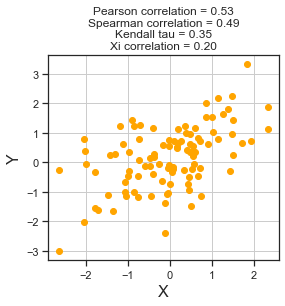

In [27]:
import matplotlib.pyplot as plt
import numpy as np

r = 0.4

X = np.random.normal(size=100)
Y = r*X + np.sqrt(1-r**2)*np.random.normal(size=100)



plt.clf()
plt.figure(figsize=(4,3.8))
plt.axes([0.17,0.12,0.8,0.75])
# plt.hold(True)
plt.plot(X, Y, 'o', color='orange')
plt.grid(True)

correlations = compute_correls(X, Y)
add_title(*correlations)
plt.xlabel("X", size=16)
plt.ylabel("Y", size=16)
plt.savefig("spearman_fig2.pdf")
plt.savefig("spearman_fig2.svg")

## Figure 3: Linear with outliers

Code from [figure description](https://en.wikipedia.org/wiki/File:Spearman_fig3.svg)

<Figure size 432x288 with 0 Axes>

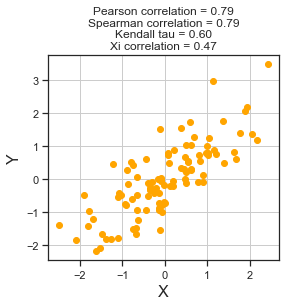

In [28]:
r = 0.8

X = np.random.normal(size=100)
Y = r*X + np.sqrt(1-r**2)*np.random.normal(size=100)

plt.clf()
plt.figure(figsize=(4,3.8))
plt.axes([0.17,0.12,0.8,0.75])
# plt.hold(True)
plt.plot(X, Y, 'o', color='orange')
plt.grid(True)

correlations = compute_correls(X, Y)
add_title(*correlations)

plt.xlabel("X", size=16)
plt.ylabel("Y", size=16)
plt.savefig("spearman_fig3.pdf")
plt.savefig("../paper/spearman_fig3.svg")


# Seaborn Anscombe's quartet

## Original code

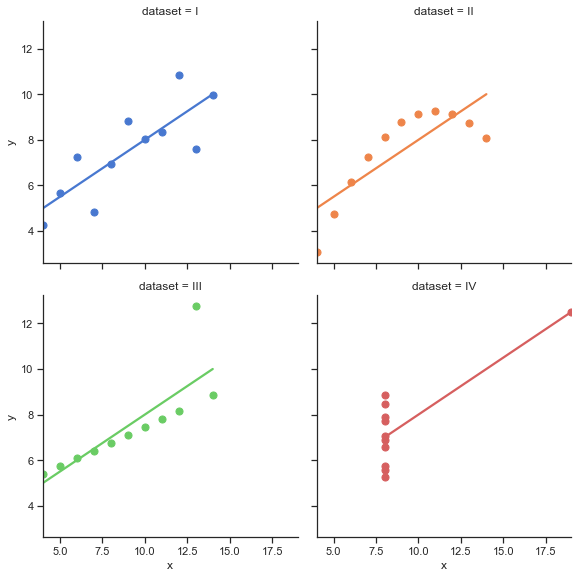

In [9]:
# Load the example dataset for Anscombe's quartet
anscombes_quartet = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
g = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombes_quartet,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [10]:
for name, df in anscombes_quartet.groupby('dataset'):
    print(f"x_{name.lower()} = {df.x.values}")
    print(f"y_{name.lower()} = {df.y.values}")

x_i = [10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
y_i = [ 8.04  6.95  7.58  8.81  8.33  9.96  7.24  4.26 10.84  4.82  5.68]
x_ii = [10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
y_ii = [9.14 8.14 8.74 8.77 9.26 8.1  6.13 3.1  9.13 7.26 4.74]
x_iii = [10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
y_iii = [ 7.46  6.77 12.74  7.11  7.81  8.84  6.08  5.39  8.15  6.42  5.73]
x_iv = [ 8.  8.  8.  8.  8.  8.  8. 19.  8.  8.  8.]
y_iv = [ 6.58  5.76  7.71  8.84  8.47  7.04  5.25 12.5   5.56  7.91  6.89]


## Compute correlations

In [13]:
methods = 'pearson', 'kendall', 'spearman', 'xi'

method_correlations = []

for method in methods:
    if method == 'xi':
        method_correlation = anscombes_quartet.groupby('dataset').apply(
            lambda d: Xi(d['x'].values, d['y'].values).correlation)
    else:
        method_correlation = anscombes_quartet.groupby('dataset').apply(
            lambda d: d['x'].corr(d['y'], method=method))
    method_correlation.name = 'correlation'
    method_correlation = method_correlation.to_frame()
    method_correlation['method'] = method
    method_correlations.append(method_correlation)
anscombe_correlations = pd.concat(method_correlations)
anscombe_correlations

,correlation,method
dataset,,
I,0.816421,pearson
II,0.816237,pearson
III,0.816287,pearson
IV,0.816521,pearson
I,0.636364,kendall
II,0.563636,kendall
III,0.963636,kendall
IV,0.426401,kendall
I,0.818182,spearman


         correlation    method
dataset                       
I           0.816421   pearson
I           0.636364   kendall
I           0.818182  spearman
I           0.275000        xi
         correlation    method
dataset                       
II          0.816237   pearson
II          0.563636   kendall
II          0.690909  spearman
II          0.600000        xi
         correlation    method
dataset                       
III         0.816287   pearson
III         0.963636   kendall
III         0.990909  spearman
III         0.725000        xi
         correlation    method
dataset                       
IV          0.816521   pearson
IV          0.426401   kendall
IV          0.500000  spearman
IV          0.000000        xi


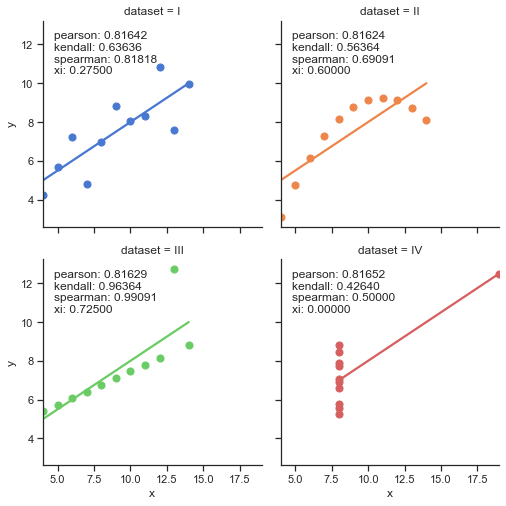

In [17]:
# Show the results of a linear regression within each dataset
g = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombes_quartet,
           col_wrap=2, ci=None, palette="muted", height=3.5,
           scatter_kws={"s": 50, "alpha": 1})
for ax, (dataset, df) in zip(g.axes.flat, anscombe_correlations.groupby('dataset')):
    print(df)
    series = df.set_index('method')['correlation']
    text = '\n'.join([f'{method}: {corr:.5f}' for method, corr in series.items()])
    
    ax.text(0.05, .95, text, verticalalignment='top', horizontalalignment='left', 
            transform=ax.transAxes)
g.savefig('../paper/anscombes_quartet_correlations.svg')
g.savefig('../paper/anscombes_quartet_correlations.png')

# Sinusoidal

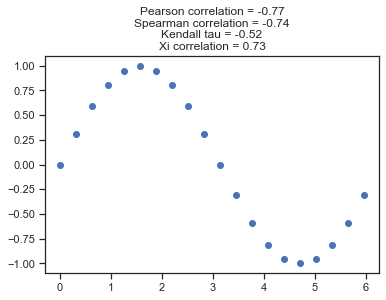

In [29]:
x = np.arange(0, 2*np.pi, step=np.pi/10)

y = np.sin(x)

fig, ax = plt.subplots()
ax.scatter(x, y)
correlations = compute_correls(x, y)
add_title(*correlations)

In [15]:
x

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
       4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604])

In [16]:
y

array([ 0.00000000e+00,  3.09016994e-01,  5.87785252e-01,  8.09016994e-01,
        9.51056516e-01,  1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
        5.87785252e-01,  3.09016994e-01,  1.22464680e-16, -3.09016994e-01,
       -5.87785252e-01, -8.09016994e-01, -9.51056516e-01, -1.00000000e+00,
       -9.51056516e-01, -8.09016994e-01, -5.87785252e-01, -3.09016994e-01])